In [9]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [10]:
df = df.drop(['Name', 'Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard'], axis=1)
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [11]:
from sklearn.model_selection import train_test_split

x = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
pred = knn.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

tn, fp, fn, tp = confusion_matrix(y_test,pred).ravel()

In [15]:
def accuracy(tp, tn, fp, fn):
    return (tp+tn)/(tp+tn+fp+fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp, fn):
    return tp / (tp + fn)

def f1_score(tp, fp, fn):
    p = precision(tp, fp)
    r = recall(tp, fn)
    return 2 * (p * r) / (p + r)

def mcc(tp, tn, fp, fn):
    num = (tp * tn) - (fp * fn)
    denom = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    return num / denom

def specificity(tn, fp):
    return tn / (tn + fp)

def npv(tn, fn):
    return tn / (tn + fn)

acc = accuracy(tp,tn,fp,fn)
prec = precision(tp, fp)
rec = recall(tp, fn)
f1 = f1_score(tp,fp,fn)
mcc = mcc(tp, tn, fp, fn)
spec = specificity(tn, fp)
npv = npv(tn, fn)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'MCC: {mcc:.4f}')
print(f'Specificity: {spec:.4f}')
print(f'Negative Predictive Value: {npv:.4f}')

Accuracy: 0.6592
Precision: 0.5287
Recall: 0.4792
F1-Score: 0.5027
MCC: 0.2451
Specificity: 0.7602
Negative Predictive Value: 0.7222


In [16]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("=================In-Built calculated==================")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

=================In-Built calculated==================
Accuracy: 0.6591760299625468
Precision: 0.5287356321839081
Recall: 0.4791666666666667
F1-score: 0.5027322404371585


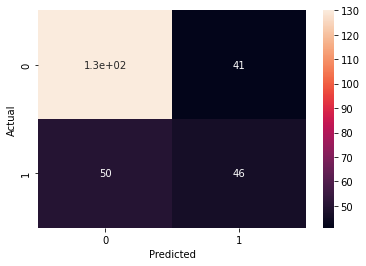

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

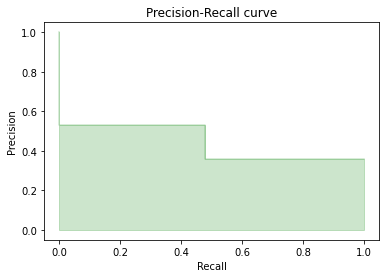

In [18]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, pred)

plt.step(recall, precision, color='g', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='g', step='post')

plt.xlabel('Recall')
plt.ylabel('Precision')

#plt.ylim([0.0, 1.0])
#plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve')
plt.show()

ROC AUC Score:  0.6197002923976609


Text(0.5, 1.0, 'ROC')

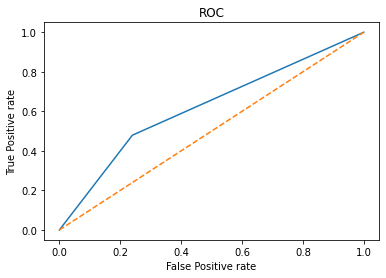

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

print("ROC AUC Score: ", roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)

plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], linestyle="--")

plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.title("ROC")
